# ML ZoomCamp Homework Session 2

This homework was described in: [homework.md](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md)

- [Getting the data](#get-data)
- [Exploratory Data Analysis (EDA)](#eda)
- [Question 1](#question-1)
- [Question 2](#question-2)
- [Question 3](#question-3)
- [Question 4](#question-4)
- [Question 5](#question-5)
- [Question 6](#question-6)

### Import Modules

In [107]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pprint

### Getting the data <a class="anchor" id="get-data"></a>

For this homework, we'll use the New York City Airbnb Open Data. Available [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)

In [41]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
if not os.path.exists("AB_NYC_2019.csv"):
    !wget $data

features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = pd.read_csv('AB_NYC_2019.csv')
df = df[features]
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [8]:
df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [23]:
print(df.shape, len(df))

(48895, 8) 48895


### Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

<AxesSubplot:xlabel='price', ylabel='Count'>

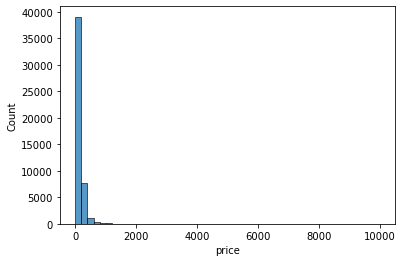

In [7]:
sns.histplot(df.price, bins=50)

**Q**: Does the variable 'price' have a long tail?
**A**: Yes, it has

### Question 1 <a class="anchor" id="question-1"></a>
Find a feature with missing values. How many missing values does it have?

In [12]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
print("[ANSWER-1] The feature 'reviews_per_month' has 10052 missing values")

[ANSWER-1] The feature 'reviews_per_month' has 10052 missing values


### Question 2 <a class="anchor" id="question-2"></a>

What's the median (50% percentile) for variable 'minimum_nights'?

In [20]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [22]:
print(f"[ANSWER-2] The median of th 'minimum_nights' feature is: {df.minimum_nights.median()}")

[ANSWER-2] The median of th 'minimum_nights' feature is: 3.0


### Split the data

In [26]:
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f"n_train:{n_train}, n_val:{n_val}, n_test:{n_test}")

n_train:29337, n_val:9779, n_test:9779


<AxesSubplot:ylabel='Count'>

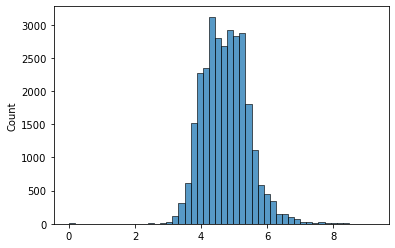

In [100]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

sns.histplot(y_train, bins=50)

In [101]:
df_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30
...,...,...,...,...,...,...,...
29332,40.71178,-73.95779,2,0,NaN,1,0
29333,40.78638,-73.97004,30,10,0.40,1,0
29334,40.72716,-73.98524,3,75,3.12,1,60
29335,40.79578,-73.94523,2,31,2.10,1,265


### Question 3 <a class="anchor" id="question-3"></a>

**Note:** For computing the mean, use the training only!

In [93]:
# Computing the trining mean
reviews_train_mean_value = df_train.reviews_per_month.mean()
reviews_train_mean_value

1.3685492094777056

In [95]:
def prepare_data(df, replace_value=None):
    df_temp = df.copy()
    if replace_value is None:
        X = df_temp.values
        #print(df_temp.reviews_per_month.isnull().sum())
        #print(df_temp.reviews_per_month.mean())
    else:
        df_temp['reviews_per_month'] = df_temp['reviews_per_month'].fillna(replace_value)
        X = df_temp.values
        #print(replace_value)
        #print(df_temp.reviews_per_month.fillna(replace_value).isnull().sum())
        #print(df_temp.reviews_per_month.fillna(replace_value).mean())
    return X
    
prepare_data(df_train, reviews_train_mean_value)

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [96]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [97]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Training Linear Regression filling minssing values with 0

In [102]:
X_train = prepare_data(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_data(df_val, 0)
y_pred = w0 + X_val.dot(w)
rmse_zero_fill = round(rmse(y_val, y_pred), 2)
rmse_zero_fill

0.64

#### Training Linear Regression filling minssing values with mean

In [103]:
X_train = prepare_data(df_train, reviews_train_mean_value)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_data(df_val, reviews_train_mean_value)
y_pred = w0 + X_val.dot(w)
rmse_mean_fill = round(rmse(y_val, y_pred), 2)
rmse_mean_fill

0.64

In [104]:
print(f"[ANSWER-3] Both cases are giving the same RMSE score: {rmse_zero_fill}")

[ANSWER-3] Both cases are giving the same RMSE score: 0.64


### Question 4 <a class="anchor" id="question-4"></a>

In [105]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [110]:
results = dict()
X_train = prepare_data(df_train, 0)
X_val = prepare_data(df_val, 0)
best_rmse = None
best_rmse_arg = None

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    raw_rmse = rmse(y_val, y_pred)
    if best_rmse is None:
        best_rmse = raw_rmse
        best_rmse_arg = r
    elif raw_rmse < best_rmse:
        best_rmse = raw_rmse
        best_rmse_arg = r
    results[r] = round(raw_rmse, 2)

pprint.pprint(results)
print(f"[ANSWER-4] Best RMSE is {best_rmse} for r value: {best_rmse_arg}")

{0: 0.64,
 1e-06: 0.64,
 0.0001: 0.64,
 0.001: 0.64,
 0.01: 0.66,
 0.1: 0.68,
 1: 0.68,
 5: 0.68,
 10: 0.68}
[ANSWER-4] Best RMSE is 0.643033778856463 for r value: 0


### Question 5 <a class="anchor" id="question-5"></a>

In [115]:
scores = list()
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_data(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_data(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))
    
print(f"[ANSWER-5] The standard deviation of all the scores is: {round(np.std(scores), 3)}")

[ANSWER-5] The standard deviation of all the scores is: 0.008


### Question 6 <a class="anchor" id="question-6"></a>

In [121]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_test['price']

X_train = prepare_data(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_data(df_test, 0)
y_pred = w0 + X_test.dot(w)


print(f"[ANSWER-6] The RMSE score in test dataset is: {round(rmse(y_test, y_pred), 2)}")


[ANSWER-6] The RMSE score in test dataset is: 0.65
